In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 探索性数据分析（EDA）

In [2]:
train_data = pd.read_csv('E:/Anaconda/jupyter/Kaggle_titanic/train.csv')
test_data = pd.read_csv('E:/Anaconda/jupyter/Kaggle_titanic/test.csv')

## 数据总览

### 查看前几行数据

In [3]:
train_data.head()
# train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 查看缺失、数据类型、数量

In [4]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 查看某特征的取值
**不能显示缺失值！！**

In [6]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 可视化分析

1. 查看**学习目标（标签）**的分布，当分布不平衡时，需要进行调整。  
2. 查看各特征各自的分布（数值 or 离散）**观察异常值**
3. 查看各特征之间及关于标签的分布,**判断特征重要性**
4. 查看各特征间的相关度。（**用于特征工程**）

In [7]:
iris = pd.read_csv('E:\\Anaconda\\jupyter\\Iris\\IRIS.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 查看数据分布

#### 查看单变量的分布
**distplot**：  
参数：  
hist（直方图）+ bins（直方图间隔）  
kde：核密度估计曲线  
rug：地毯图  
reg: 回归拟合
*kdeplot、regplot和rugplot也可单独作图*  
&nbsp;  
**boxplot**：数值型变量可用

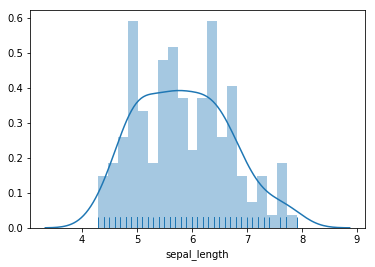

In [8]:
sns.distplot(iris['sepal_length'],bins=20, hist=True, kde=True, rug=True)

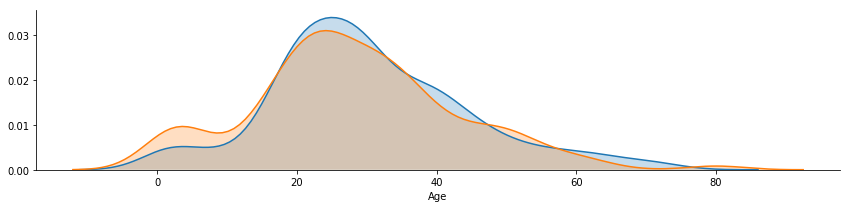

In [78]:
sns.FacetGrid(train_data, hue='Survived',aspect=4).map(sns.kdeplot, 'Age', shade=True)

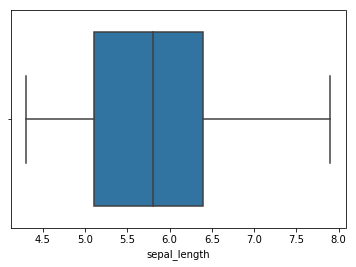

In [9]:
sns.boxplot(x=iris['sepal_length'], orient='w')

#### 查看多变量的分布
1. jointplot：  
kind可选scatter（默认）、hex（适合大数据集）、kde  
&nbsp;
2. pairplot：  
能够将数据集中所有特征两两做散点图，**能够加入hue区分离散变量**  
&nbsp;
3. PairGrid：  
pairplot的升级版，能通过map_diag和map_offdiag分别定义作图类型

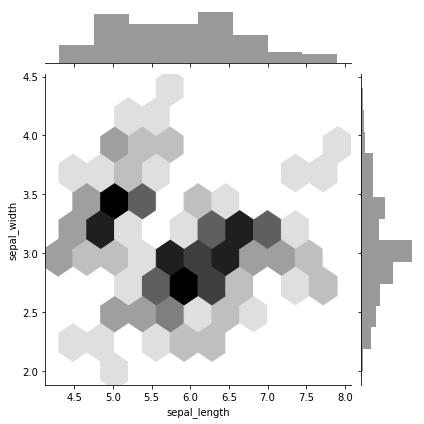

In [10]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='hex', color='k')

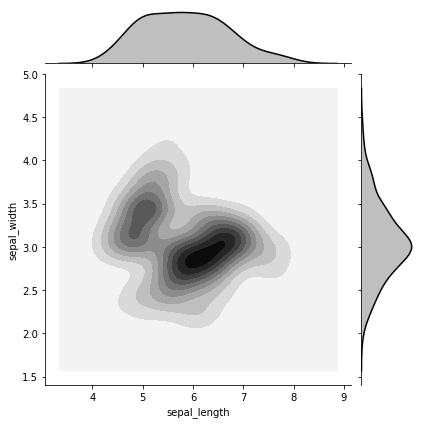

In [11]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='kde', color='k')

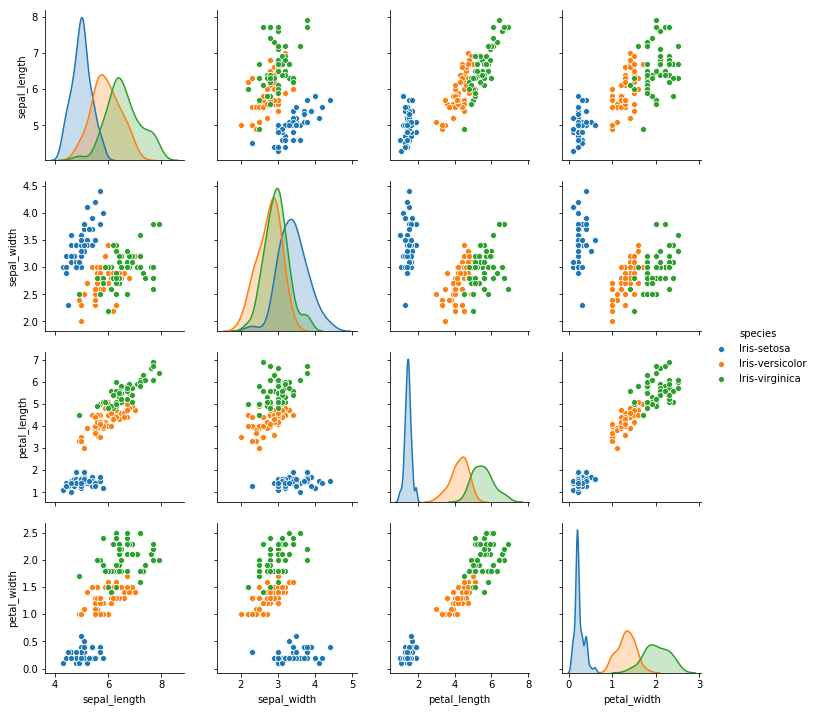

In [12]:
sns.pairplot(iris, hue='species')

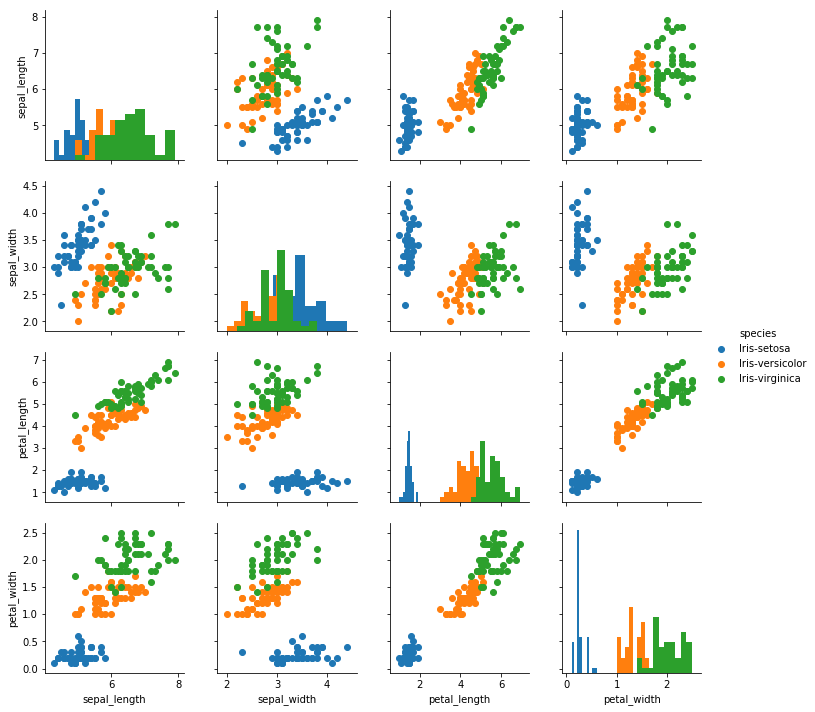

In [13]:
sns.PairGrid(iris, hue='species').map_diag(plt.hist).map_offdiag(plt.scatter).add_legend()

#### 离散特征统计
1. barplot（默认统计均值）
2. countplot（直方图）
3. boxplot
4. pie（饼图）

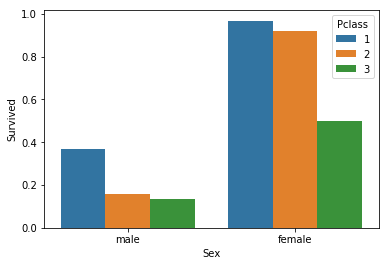

In [14]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_data,ci=0)

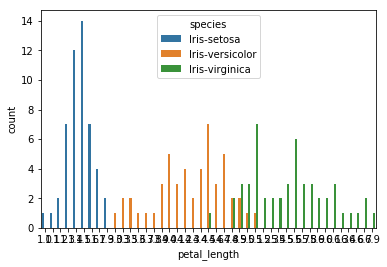

In [15]:
sns.countplot(x="petal_length", data=iris, hue="species")

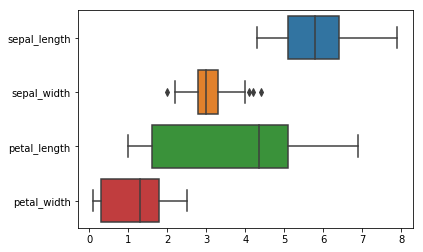

In [16]:
sns.boxplot( data=iris, orient="h")  # orient：取向，可取值为'h'和'w'

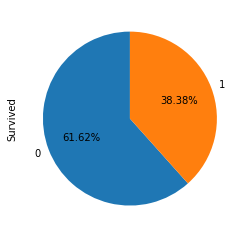

In [17]:
train_data['Survived'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)

###  绘制回归拟合曲线
**regplot & Implot**：  
regplot作为implot的子集，可以接受任何形式的x、y输入    
参数：order(回归阶次)、robust(排除异常的能力)

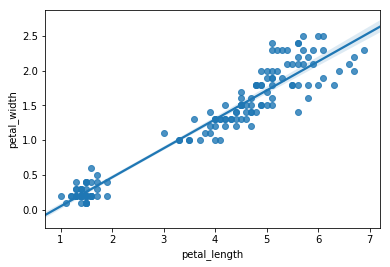

In [18]:
sns.regplot(x="petal_length", y="petal_width", data=iris, order=1)

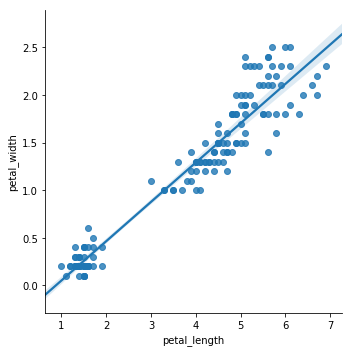

In [19]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, robust=True)

### 查看离散特征与连续特征的关系
1. scatter/stripplot/swarmplot
2. boxplot
3. vdiolinplot

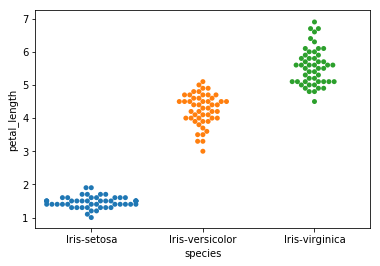

In [20]:
sns.swarmplot(x="species", y="petal_length", data=iris)



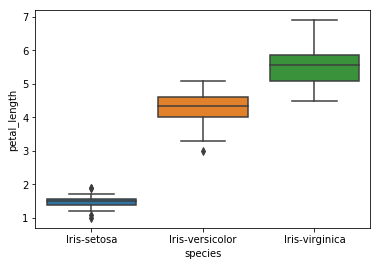

In [21]:
sns.boxplot(x="species", y="petal_length", data=iris)

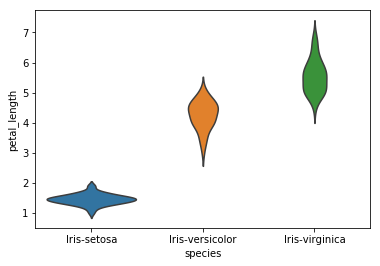

In [22]:
sns.violinplot(x="species", y="petal_length", data=iris, inner=None)

### 分类作图（Catplot / FacetGrid）
1. catplot  
       x(y)、data  
       hue:同一张图，不同颜色代表的不同类别  
       col:不同图代表的不同类别  
       order:x的某些取值  
       hue_order:hue的某些取值
       kind:画图类型，有strip(默认), swarm, box, violin,boxen,point, bar, count
       aspect:宽高比  
       heght:高  
       col_wrap:每行的col数目  
&nbsp;  
2. FacetGrid + map函数（能够绘制catplot不支持的画图类型）

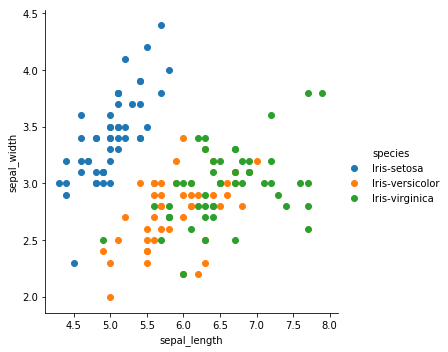

In [23]:
sns.FacetGrid(iris, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

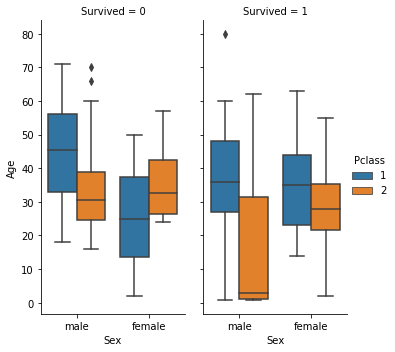

In [24]:
sns.catplot(x="Sex", y="Age", hue="Pclass",
              col="Survived", hue_order=[1,2], data=train_data, kind="box",aspect=0.5)

# 数据清洗/预处理

## 处理缺失值
可以通过字典类型集成代码，对多列同时填补缺失：  
```train_data.fillna({'Cabin':'U0', 'Embarked':train_data['Embarked'].dropna().mode()}, inplace=True)```

### 删除缺失样本
**适用于数据集很多，有缺失样本很少的情况**

In [25]:
'''
删除全为NaN的行/列
'''
train_data.dropna(how='all', axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 填补缺失值
用于不重要的特征，离散值一般用**众数**填补，连续值一般用**均值**填补

In [59]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

### 作为新取值
对于离散特征，例如“泳池大小”特征（大，中，小），NaN代表没有泳池，可以作为新的一种特征取值“无”

In [48]:
train_data['Cabin'].fillna('U0', inplace=True)

### 使用模型预测缺失属性值

In [29]:
'''
以随机森林为例 / 泰坦尼克数据集
'''
from sklearn.ensemble import RandomForestRegressor

age_predict = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_notnull = age_predict[train_data['Age'].notnull()]
age_isnull = age_predict[train_data['Age'].isnull()]
age_train = age_notnull.values[: ,1:]
age_label = age_notnull.astype('int').values[: ,0]
age_test = age_isnull.values[: ,1:]

RF = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
RF.fit(age_train, age_label)
predictAges = RF.predict(age_test)

train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

## 删除重复值

In [79]:
train_data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,U0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,U0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S
5,6,0,3,"Moran, Mr. James",male,21.0,0,0,330877,8.4583,U0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,U0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U0,C


## 删除异常值

# 特征工程

# 模型选择与集成

In [31]:
'''
随机生成1000个样本，10特征，2分类的数据集，充当实验数据，并按73开划分训练测试集
'''
x, y = make_classification(n_samples=1000, n_features=10, n_classes=2)
feature = list('abcdefghij')
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2019, test_size=0.3)

## baseline模型的建立
- 训练集得分
- 交叉验证得分
- 特征重要性

In [32]:
def baseline_modelfit(clf, x_train, y_train, cv_folds=5, feature=[], featureImportance=True):
    
    # use clf fit train data
    clf.fit(x_train, y_train)
    
    # predict train data
    y_predict = clf.predict(x_train)
    
    # cross_validation
    cv_score = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=cv_folds)
    
    # print model report
    print('model report')
    print('-'*60)
    print('Accuracy(Train): %g' % accuracy_score(y_train, y_predict))
    print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    if featureImportance:
        fi = pd.Series(clf.feature_importances_, feature).sort_values(ascending=False)
        fi.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importances Score')

model report
------------------------------------------------------------
Accuracy(Train): 0.981429
CV Score : Mean - 0.8957018 | Std - 0.009825907 | Min - 0.8848921 | Max - 0.9071429


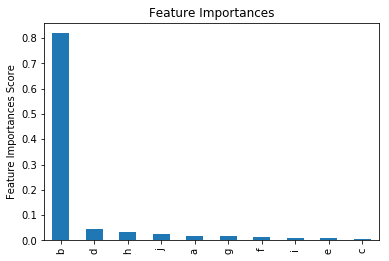

In [33]:
gbm = GradientBoostingClassifier(random_state=20190805)
baseline_modelfit(gbm, x_train, y_train, feature=feature)

## 调参方法

### 网格搜索调参步骤

In [34]:
param = {'C': [0.1, 0.5, 1],'max_iter':[100, 200, 300]}
grid_search = GridSearchCV(LogisticRegression(n_jobs=-1),param, scoring='accuracy', cv=5)

grid_search.fit(x,y)

print(grid_search.best_params_, grid_search.best_score_)

{'C': 0.5, 'max_iter': 100} 0.882


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\lenovo\Anaconda3\lib\site-packages\

### 贝叶斯调参步骤

#### 建立黑盒函数（输入：待调参数； 输出：CV验证集得分）
- 贝叶斯搜索的是连续值，对于某些参数，需取整（如搜索出的数的个数为2.5，应取整为2）
- 贝叶斯优化的目标函数是最大值，对于最小值指标需人为添加负号

In [35]:
def rf_cv(n_estimators, min_samples_split, max_features, max_depth):
    val = cross_val_score(
        RandomForestClassifier(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=min(max_features, 0.999),
            max_depth=int(max_depth),
            random_state=2019,
            n_jobs=-1
        ),
        x, y, scoring='roc_auc', cv=20
    ).mean()
    return val

#### 建立贝叶斯优化器：BayesianOptimization(黑盒函数，待调参数范围字典)

In [36]:
rf_bo = BayesianOptimization(
    rf_cv,
    {'n_estimators': (10, 250),
     'min_samples_split': (2, 25),
     'max_features': (0.1, 0.999),
     'max_depth': (5, 15)}
    )

#### 调用maxmize方法
- init_point: 初始随机选取的点数
- n_inter: 迭代轮数

In [37]:
rf_bo.maximize(init_points=3, n_iter=30)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9626   |  14.62    |  0.7193   |  4.543    |  62.75    |
|  2        |  0.9646   |  13.11    |  0.9876   |  17.08    |  180.3    |
|  3        |  0.9659   |  8.317    |  0.333    |  12.69    |  239.6    |
|  4        |  0.9658   |  5.435    |  0.4817   |  2.184    |  249.6    |
|  5        |  0.9534   |  11.45    |  0.1604   |  24.97    |  249.9    |
|  6        |  0.9631   |  5.904    |  0.6795   |  24.7     |  10.11    |
|  7        |  0.9448   |  5.0      |  0.1      |  2.0      |  97.55    |
|  8        |  0.9501   |  13.61    |  0.7785   |  2.378    |  10.04    |
|  9        |  0.9627   |  15.0     |  0.217    |  2.292    |  237.5    |
|  10       |  0.9616   |  14.86    |  0.2667   |  24.91    |  73.7     |
|  11       |  0.9618   |  14.67    |  0.9882   |  24.51    |  10.59    |
|  12       |  0.9659   |  5.0      | 

#### 调用max方法得出最佳参数组合和得分

In [38]:
rf_bo.max

{'target': 0.966496923076923,
 'params': {'max_depth': 5.218488186294858,
  'max_features': 0.9891880799736463,
  'min_samples_split': 24.924678096223655,
  'n_estimators': 154.8283635316636}}

## 机器学习模型调参经验方法

In [39]:
GradientBoostingClassifier().get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### GBM
#### 参数列表
1. **基于树的参数**(需要调整):  
  1. min_samples_split:  
     含义：某个结点可以继续的分裂的最小样本数  
     作用：控制过拟合，值越大越不容易过拟合，太高会导致欠拟合  
  2. min_sample_leaf:  
     含义：叶子结点最小含有的样本数  
     作用：控制过拟合，在处理类别不均衡问题时应设置较小值

  3. min_weight_fraction_leaf:  
     含义：和min_samples_split类似，但是一个比值  
     作用：控制过拟合，和min_sample_leaf只需定义一个
  4. max_depth:  
     含义：树的最大深度    
     作用：控制过拟合，值越大越容易过拟合  
  5. max_leaf_nodes:  
     含义：最大叶子结点的数目  
     作用：控制过拟合，不能和max_depth同时定义，同时定义是GBM会忽略max_depth  
  6. max_features:  
     含义：分裂所需考虑的特征数，这些特征被随机选取  
     作用：增加多样性，根据经验法则，选用'sqrt'较好
2. **提升相关参数**(需要调整):  
  1. learning_rate:  
     含义：决定每棵树在最终结果中所占权重    
     作用：越小拟合效果越好，越小需要n_estimators越大，开销越大  
  2. n_estimators:  
     含义：基树的数量  
     作用：需要和learning_rate相匹配，否则过大容易过拟合  
  3. subsample:  
     含义：随机选取全部样本中的一部分样本    
     作用：略小于1时使得模型更稳定，典型值0.8
3. **通用参数**： 
  1. loss:  
     含义：损失函数类型  
     作用：默认即可
  2. init:  
     含义：设置模型参数的初始值  
     作用：当加载模型参数继续训练时使用
  3. random_state:  
     含义：随机数种子  
     作用：比较模型的时候应统一，可设一个幸运数字
  4. verbose:  
     含义：模型训练过程中的显示设置    
     作用：默认为0不显示，为1时以特定间隔显示，>1时为所有树生成结果  
  5. warm_start:  
     含义：在原来的模型上增加树继续训练  
     作用：将更多的树拟合到现有模型，节约时间
  6. persort:  
     含义：选择是否对数据与排序  
     作用：默认为是，加快分裂，无需更改

#### 调参步骤
1. 首先选择一个较高且合适的learning_rate，一般0.1即可，0.05-0.2也可能有效。（目的是为了加速计算，learning_rate一定是越低越小，但开销会增大）  
&nbsp;
2. 决定该learning_rate下合适的n_estimators，一般为40-70。（如果n_estimators around 20，则应该减小learning_rate，增加n_estimators的值；如果n_estimators＞100，则应该增大learning_rate，减小n_estimators的值，否则调参效率过低）  
&nbsp;
3. 同时调整max_depth和min_samples_split，因为这两个参数对模型影响较大。初始化max_depth一般为range(5, 16, 2)，min_samples_split一般为range(200, 1000, 200)  
&nbsp;
4. 根据结果继续调整max_depth和min_samples_split，并加入min_samples_leaf同时调整，min_samples_leaf一般为(30, 71, 10)  
&nbsp;
5. 在上述步骤，使用默认的'sqrt'，确定其他参数后，各特征的权重基本已被合理分配，可以调整基于树的最后一个参数max_features，取值根据原始特征数决定  
&nbsp;
6. 调节基于提升的最后一个参数subsample，一般为[0.6,0.7,0.75,0.8,0.85,0.9]  
&nbsp;
7. 最后减半learnning_rate，加倍n_estimators；十分之一learnning_rate，十倍n_estimators;二十分之一learnning_rate，二十倍n_estimators...直到前后两个指标变化不明显，即为最终的得分。

In [40]:
import xgboost as xgb
xgb.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

### XGBoosting
#### 参数列表
1. **通用参数**:  
  1. booster:  
     含义：选择基学习器模型  
     作用：用于分类选择'gbtree'，用于回归选择'gblinear'  
  2. silent:  
     含义：是否打印运行的消息  
     作用：默认为None，打印，默认即可

  3. nthread :  
     含义：设置参与计算的核心数  
     作用：默认为None，运用全部核心
2. **树提升相关参数**(需要调整):  
  1. learning_rate(或eta):  
     含义：决定每棵树在最终结果中所占权重    
     作用：越小拟合效果越好，越小需要n_estimators越大，开销越大  
  2. n_estimators:  
     含义：基树的数量  
     作用：需要和learning_rate相匹配，否则过大容易过拟合  
  3. min_child_weight:  
     含义：叶子结点的最小权重总和  
     作用：控制过拟合，过高容易欠拟合    
  4. max_depth：  
     含义：基树的最大深度  
     作用：控制过拟合，过高容易过拟合，典型值3-10  
  5. gamma:
     含义：判断结点分裂时，只有分裂后损失函数值降低才会分裂。gamma决定了下降值的大小  
     作用：gamma值越大，算法越保守，和损失函数息息相关，必须调整  
  6. max_delta_step:  
     含义：每棵树权重改变的最大步长  
     作用：设置为0时意味没有约束，当为正时，算法更加保守，通常无需设置，有利于类别不均衡问题  
  7. subsample:   
     含义：随机选取全部样本中的一部分样本    
     作用：略小于1时使得模型更稳定，典型值0.8  
  8. colsample_bytree:  
     含义：类似于GBM中的max_features
     作用：增加多样性，控制过拟合
  9. colsample_bynode:  
     含义：控制树每个结点分裂对特征的采样比例  
     作用：不常用，常用subsample和colsample_bytree
  10. colsample_bylevel:  
      含义：控制树每层分裂对特征的采样比例  
      作用：不常用，常用subsample和colsample_bytree
  11. reg_lambda:    
      含义：L2正则化权重  
      作用：减少过拟合
  12. reg_alpha:  
      含义：L1正则化权重  
      作用：可以在非常高维度特征时使用，加速训练  
  13. scale_pos_weight:  
      含义：类别不平衡权重  
      作用：在类别十分不平衡时，可以设置为正值，加速收敛  
  
3. **学习任务参数**： 
  1. objective:  
     含义：定义损失函数  
     作用：二分类'binary:logistic'；多分类'multi:softmax'和'multi:softprob'
  2. seed:  
     含义：随机数种子  
     作用：比较模型的时候应统一，可设一个幸运数字
  3. missing:  
     含义：选择作为缺失值的树    
     作用：默认为NaN，默认即可

#### 调参步骤
1. 初始化树参数：max_depth=5(可能值3-10)，min_child_weight=1(默认值)，gamma=0(默认值，一个较小值0.1-0.2也可，必调参数)，subsample,colsample_bytree=0.8(常用值)，scale_pos_weigth(默认值)  
&nbsp;
2. 首先选择一个较高且合适的learning_rate，一般0.1即可，0.05-0.3也可能有效。（目的是为了加速计算，learning_rate一定是越低越小，但开销会增大）  
&nbsp;
3. 决定该learning_rate下合适的n_estimators，一般为40-70。（如果n_estimators around 20，则应该减小learning_rate，增加n_estimators的值；如果n_estimators＞100，则应该增大learning_rate，减小n_estimators的值，否则调参效率过低）  
&nbsp;
4. 同时调整max_depth和min_child_weight，因为这两个参数对模型影响较大。初始化max_depth一般为range(3, 10, 2)，min_child_weight一般为range(1, 6, 2)  
&nbsp;
5. 调整gamma，一般为range(0,5)/10  
&nbsp;
6. 同时调整subsampe和colsample_bytree，一般为range(6,10)/10，近一步缩小为range(6,10)/100   
&nbsp;
7. 调整正则化参数reg_alpha或reg_lambda，控制过拟合，一般为[1e-5, 1e-2, 0.1, 1, 100]  
&nbsp;
8. 最后减半learnning_rate，加倍n_estimators；十分之一learnning_rate，十倍n_estimators;二十分之一learnning_rate，二十倍n_estimators...直到前后两个指标变化不明显，即为最终的得分。

## 模型融合
![1](https://images2018.cnblogs.com/blog/890640/201805/890640-20180507150127211-481098315.jpg)

In [41]:
def stacking_predict(first_level_models, second_level_model, x_train, y_train, x_test, n_folds=5):
        train_num, test_num = x_train.shape[0], x_test.shape[0]
        second_level_train =  np.zeros((train_num,))
        second_level_test = np.zeros((test_num,))
        test_nfolds_sets = np.zeros((test_num, n_folds))
        kf = KFold(n_splits=n_folds)
        trains = []
        tests = []
         
        '''
        对每个一级模型，K折交叉验证的预测结果组成一个新的m行1列的训练集(np.array格式)，并存入trains数组
                        K折交叉验证的训练模型对测试集预测K次，将结果取平均，得到m行1列的测试集(np.array格式)，并存入tests数组
        '''
        for alg in first_level_models: 
            for i,(train_index, test_index) in enumerate(kf.split(x_train)):
                x_train_cv, y_train_cv = x_train[train_index], y_train[train_index]
                x_test_cv, y_test_cv = x_train[test_index], y_train[test_index]
                
                alg.fit(x_train_cv, y_train_cv)
                second_level_train[test_index] = alg.predict(x_test_cv)
                test_nfolds_sets[:,i] = alg.predict(x_test)
            second_level_test = test_nfolds_sets.mean(axis = 1)
            trains.append(second_level_train.reshape(-1, 1))
            tests.append(second_level_test.reshape(-1, 1))
        
        '''
        将trains数组中的各子集通过concatenate连接，组成新的训练集和测试集，标签分别为原始数据的训练集和测试集标签
        '''
        second_train = np.concatenate(trains, axis=1)
        second_test = np.concatenate(tests, axis=1)
        
        '''
        使用二级模型对新的测试集做训练，返回预测结果
        '''
        
        second_level_model.fit(second_train, y_train)
        predict = second_level_model.predict(second_test)
        
        return predict  

In [42]:
'''范例'''
LR = LogisticRegression()
RF = RandomForestClassifier()
y_new = stacking_predict([LR, RF],GradientBoostingClassifier(),x_train, y_train, x_test)

accuracy_score(y_new, y_test)

0.8533333333333334